<a href="https://colab.research.google.com/github/princecj65779/Ensembles-602/blob/main/HW_602_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **AIM**
Analysing flights data and running various models to find out the delay.

#### **Importing Libraries**

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_validate
import plotly.graph_objects as go
import plotly.offline as py

#### **Loading Dataset**

In [33]:
#Read DataFrame
flights = pd.read_csv('https://raw.githubusercontent.com/Vaibhav-1911/DATA-602/main/Assignment%208/flight-data.csv')
flights

carrier  flight tailnum origin  ... engines  seats     engine  arr_delay
0         B6    1201  N643JB    JFK  ...     2.0  200.0  Turbo-fan        1.0
1         DL    1773  N3743H    JFK  ...     2.0  189.0  Turbo-jet        0.0
2         EV    4572  N11107    EWR  ...     2.0   55.0  Turbo-fan        1.0
3         B6     179  N526JB    JFK  ...     NaN    NaN        NaN        1.0
4         US    1733  N162UW    LGA  ...     2.0  199.0  Turbo-jet        0.0
...      ...     ...     ...    ...  ...     ...    ...        ...        ...
9995      UA     535  N525UA    JFK  ...     NaN    NaN        NaN        1.0
9996      DL    1147  N977DL    LGA  ...     2.0  142.0  Turbo-fan        1.0
9997      EV    4204  N12163    EWR  ...     2.0   55.0  Turbo-fan        NaN
9998      B6     431  N585JB    LGA  ...     2.0  200.0  Turbo-fan        1.0
9999      B6    2302  N368JB    JFK  ...     2.0   20.0  Turbo-fan        0.0

[10000 rows x 25 columns]

#### **Exploring Dataset**

In [34]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carrier       10000 non-null  object 
 1   flight        10000 non-null  int64  
 2   tailnum       9926 non-null   object 
 3   origin        10000 non-null  object 
 4   dest          10000 non-null  object 
 5   air_time      9716 non-null   float64
 6   distance      10000 non-null  int64  
 7   hour          10000 non-null  int64  
 8   minute        10000 non-null  int64  
 9   temp          9952 non-null   float64
 10  dewp          9952 non-null   float64
 11  humid         9952 non-null   float64
 12  wind_dir      9731 non-null   float64
 13  wind_speed    9951 non-null   float64
 14  wind_gust     2387 non-null   float64
 15  precip        9954 non-null   float64
 16  pressure      8808 non-null   float64
 17  visib         9954 non-null   float64
 18  type          8499 non-null

In [35]:
flights1 = dataset.drop(["carrier", "tailnum", "origin", "dest", "type", "manufacturer", "model", "engine"], axis=1)

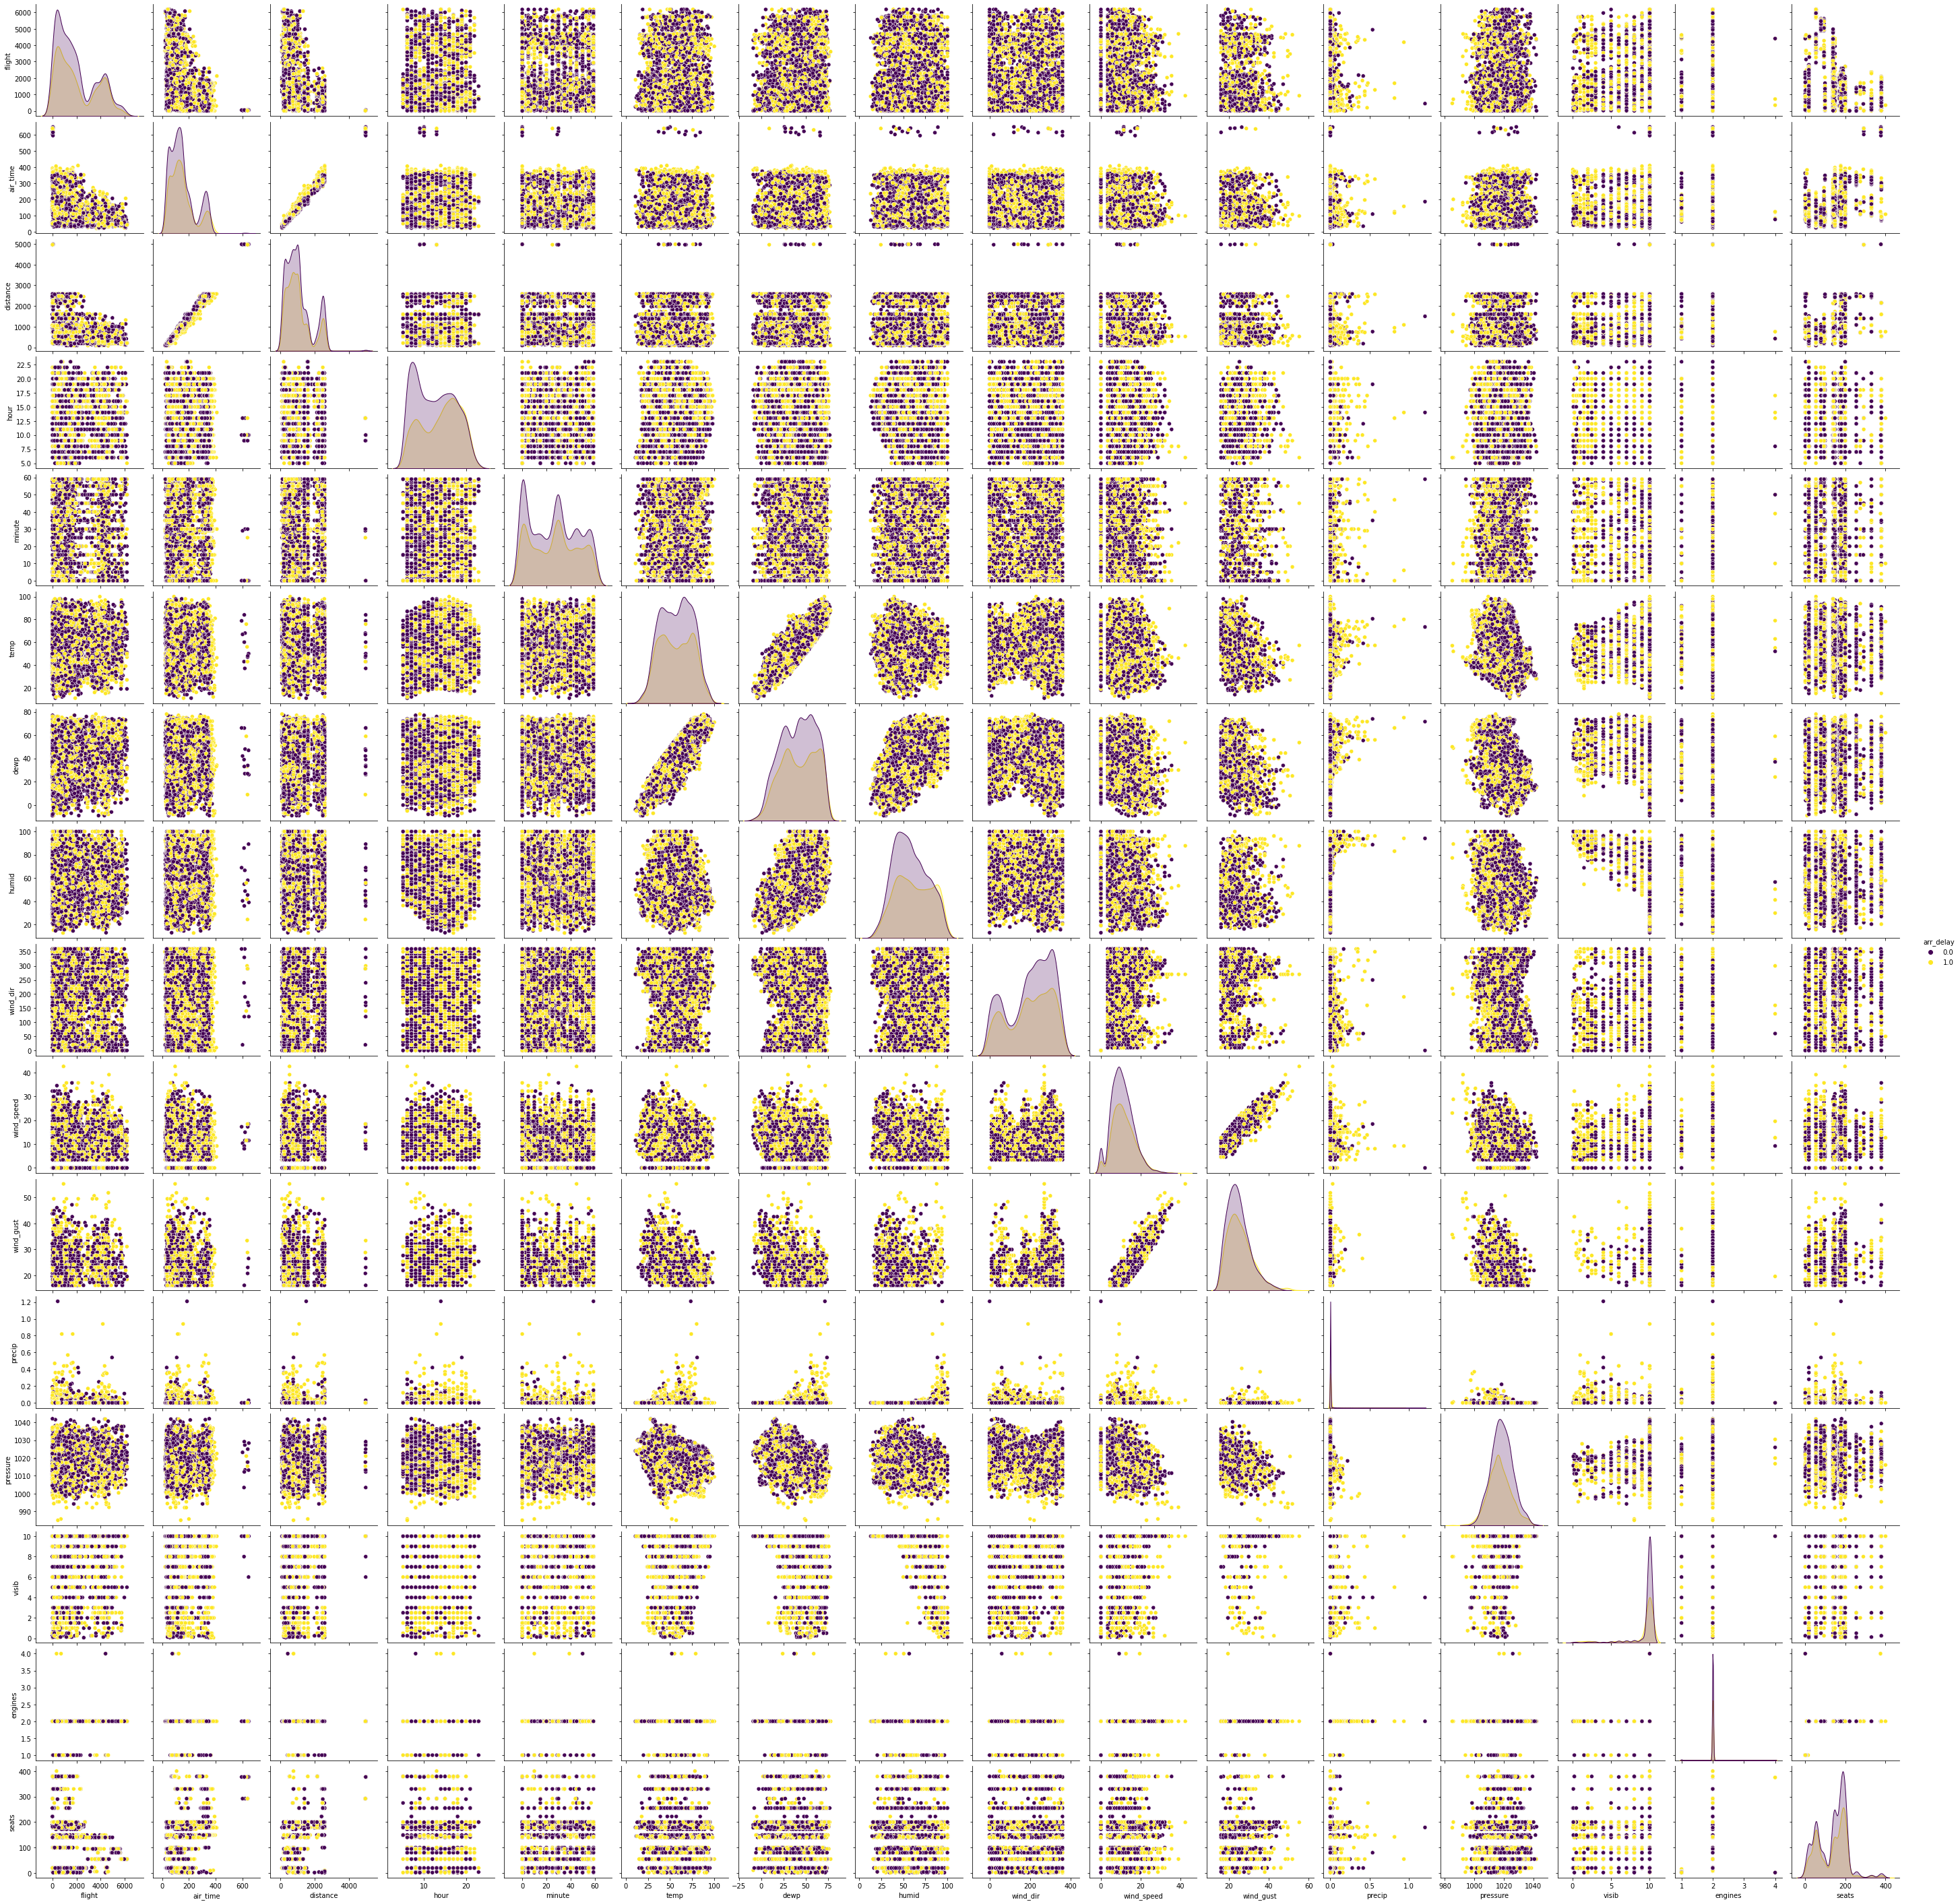

In [36]:
sns.pairplot(flights1, hue = 'arr_delay', palette = 'viridis')

###### **Replacing null values with mean**

In [37]:
flights2 = flights1.apply(lambda x: x.fillna(x.mean()),axis=0)

In [38]:
X=flights2.iloc[:,0:16]
print(X)

      flight    air_time  distance  ...  visib   engines      seats
0       1201  135.000000      1069  ...   10.0  2.000000  200.00000
1       1773  287.000000      2248  ...   10.0  2.000000  189.00000
2       4572   84.000000       594  ...    5.0  2.000000   55.00000
3        179  305.000000      2153  ...   10.0  1.993293  135.89787
4       1733   78.000000       544  ...   10.0  2.000000  199.00000
...      ...         ...       ...  ...    ...       ...        ...
9995     535  323.000000      2475  ...   10.0  1.993293  135.89787
9996    1147  106.000000       762  ...   10.0  2.000000  142.00000
9997    4204  149.771099      1325  ...    9.0  2.000000   55.00000
9998     431  146.000000      1047  ...   10.0  2.000000  200.00000
9999    2302   64.000000       301  ...   10.0  2.000000   20.00000

[10000 rows x 16 columns]


In [39]:
flights2["arr_delay"] = flights2["arr_delay"].astype(int)

In [40]:
target=flights2.iloc[:,16]
print(target)

0       1
1       0
2       1
3       1
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: arr_delay, Length: 10000, dtype: int64


#### **Splitting Dataset and feature engineering**

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, target_train, target_test = train_test_split(X, target, test_size = 0.20)

In [42]:
flights1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   flight      10000 non-null  int64  
 1   air_time    9716 non-null   float64
 2   distance    10000 non-null  int64  
 3   hour        10000 non-null  int64  
 4   minute      10000 non-null  int64  
 5   temp        9952 non-null   float64
 6   dewp        9952 non-null   float64
 7   humid       9952 non-null   float64
 8   wind_dir    9731 non-null   float64
 9   wind_speed  9951 non-null   float64
 10  wind_gust   2387 non-null   float64
 11  precip      9954 non-null   float64
 12  pressure    8808 non-null   float64
 13  visib       9954 non-null   float64
 14  engines     8499 non-null   float64
 15  seats       8499 non-null   float64
 16  arr_delay   9716 non-null   float64
dtypes: float64(13), int64(4)
memory usage: 1.3 MB


In [43]:
flights_copy = flights2.copy(deep = True)
flights_copy[['flight', 'air_time', 'distance', 
         'hour','minute', 'temp', 'dewp',
         'humid', 'wind_dir','wind_speed',
         'wind_gust', 'precip', 'pressure',
         'visib', 'engines', 'seats']] = flights_copy[['flight', 'air_time', 'distance', 
                                                  'hour','minute', 'temp', 'dewp',
                                                  'humid', 'wind_dir','wind_speed',
                                                  'wind_gust', 'precip', 'pressure',
                                                  'visib', 'engines', 'seats']].replace(0,'0.0')

In [44]:
from sklearn.model_selection import train_test_split

feature_col_names = ['flight', 'air_time', 'distance', 'hour', 'minute', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed',
                    'wind_gust', 'precip', 'pressure', 'visib', 'engines', 'seats']
predicted_class_names = ['arr_delay']

X = flights_copy[feature_col_names].values
y = flights_copy[predicted_class_names].values

split_test_size = 0.2

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = split_test_size,random_state=43)

In [45]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df_copy.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df_copy.index)) * 100))

80.00% in training set
20.00% in test set


#### **Checking the status of delayed flights on splitted dataset**

In [63]:
print("Original Delayed  : {0} ({1:0.2f}%)".format(len(df_copy.loc[df_copy['arr_delay'] == 1]), (len(df_copy.loc[df_copy['arr_delay'] == 1])/len(df_copy.index)) * 100.0))
print("Original Non-Delayed : {0} ({1:0.2f}%)".format(len(df_copy.loc[df_copy['arr_delay'] == 0]), (len(df_copy.loc[df_copy['arr_delay'] == 0])/len(df_copy.index)) * 100.0))
print("")
print("Training Delayed  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training Non-delayed : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test Delayed      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test Non-Delayed     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original Delayed  : 3984 (39.84%)
Original Non-Delayed : 6016 (60.16%)

Training Delayed  : 3203 (40.04%)
Training Non-delayed : 4797 (59.96%)

Test Delayed      : 781 (39.05%)
Test Non-Delayed     : 1219 (60.95%)


### **Running Decision tree, Logistic Regression and SVM using Grid Search**

#### **Creating Pipeline**

In [64]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

cat_vars = [-1]
num_vars = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

num_pipeline = Pipeline([('impute_missing', SimpleImputer(missing_values=0.0,strategy='mean')),
                           ('standardize_num', StandardScaler())
                        ])

cat_pipeline = Pipeline([('impute_missing_cat_vars', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cat_vars', OneHotEncoder(handle_unknown='ignore', drop='first'))])
    
num_transformer = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, num_vars)])
    
processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, num_vars),
                                                      ('create_dummies', OneHotEncoder(handle_unknown='ignore'), cat_vars)
                                                     ]
                                        )
print('Pipeline Created')

Pipeline Created


In [48]:
flights_copy[feature_col_names]

flight    air_time  distance  ...  visib   engines      seats
0       1201  135.000000      1069  ...   10.0  2.000000  200.00000
1       1773  287.000000      2248  ...   10.0  2.000000  189.00000
2       4572   84.000000       594  ...    5.0  2.000000   55.00000
3        179  305.000000      2153  ...   10.0  1.993293  135.89787
4       1733   78.000000       544  ...   10.0  2.000000  199.00000
...      ...         ...       ...  ...    ...       ...        ...
9995     535  323.000000      2475  ...   10.0  1.993293  135.89787
9996    1147  106.000000       762  ...   10.0  2.000000  142.00000
9997    4204  149.771099      1325  ...    9.0  2.000000   55.00000
9998     431  146.000000      1047  ...   10.0  2.000000  200.00000
9999    2302   64.000000       301  ...   10.0  2.000000   20.00000

[10000 rows x 16 columns]

#### **Logistic Regression**

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

p1 = Pipeline([('processing', processing_pipeline),
             ('lr', LogisticRegression(solver='liblinear'))])

params = {'lr__C': [0.01, 0.1, 1, 10]}

lr_gscv = GridSearchCV(p1, param_grid=params, cv=10, scoring='accuracy', refit=True)
lr_gscv = lr_gscv.fit(X_train, y_train)

print(f'Logistic Regression Validation score: {lr_gscv.best_score_:.2%}')

lr_pred = lr_gscv.predict(X_test)

print(f'Logistic Regression Test score: {lr_gscv.score(X_test, y_test):.2%}')

Logistic Regression Validation score: 64.41%
Logistic Regression Test score: 63.20%


#### **Decision Tree**

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

p2 = Pipeline([('processing', processing_pipeline),
             ('dt', DecisionTreeClassifier())])

params = {'dt__max_depth': [1, 5, 10, 15, 25],
         'dt__min_samples_split': [3, 10, 15]}

dt_gscv = GridSearchCV(p2, param_grid=params, cv=10, scoring='accuracy', refit=True)
dt_gscv = dt_gscv.fit(X_train, y_train)

print(f'Validation score: {dt_gscv.best_score_:.2%}')

dt_pred = dt_gscv.predict(X_test)

print(f'Test score: {dt_gscv.score(X_test, y_test):.2%}')

Validation score: 64.76%
Test score: 65.20%


In [68]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [52]:
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

#### **Support Vector Machine**

In [53]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

p3 = Pipeline([('processing', processing_pipeline),
             ('svm', SVC())])

params = {'svm__kernel': ['linear'], 'svm__C': [0.01, 0.1, 1, 10]}

svm_gscv = GridSearchCV(p3, param_grid=params, cv=10, scoring='accuracy', refit=True)
svm_gscv = svm_gscv.fit(X_train, y_train)

print(f'Validation score: {svm_gscv.best_score_:.2%}')

svm_pred = svm_gscv.predict(X_test)

print(f'Test score: {svm_gscv.score(X_test, y_test):.2%}')

Validation score: 62.81%
Test score: 64.85%


#### **Ensemble**

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import numpy as np

clf1 = LogisticRegression(penalty = 'l2', C= 0.01, solver='lbfgs', random_state=0)
clf2 = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=1)
clf3 = SVC(kernel= 'linear', C=1)

pipe1 = Pipeline([('scaler', StandardScaler()),('logreg', clf1)])
pipe2 = Pipeline([('scaler', StandardScaler()),('tree', clf2)])
pipe3 = Pipeline([('scaler', StandardScaler()),('svm', clf3)])

labs = ['Logistic Regression', 'Decision Tree', 'SVM']
clfs = [pipe1, pipe2, pipe3]
clfs = zip(labs, clfs)

for lab, clf in clfs:
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='roc_auc')
    print(f'ROC AUC {scores.mean():.2f} (+/- {scores.std():.2f}) [{lab}]')

ROC AUC 0.63 (+/- 0.02) [Logistic Regression]
ROC AUC 0.56 (+/- 0.01) [Decision Tree]
ROC AUC 0.66 (+/- 0.01) [SVC]


**Running ensemble gives us better results than validation scores we got above**

#### **ADA Boost**

In [66]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

xt = processing_pipeline.fit_transform(X_train)

params = {'base_estimator__max_depth': [1,2],
         'n_estimators': [50, 100, 200, 400]
         }

#ABC = AdaBoostClassifier(base_estimator=p2)
ABC = AdaBoostClassifier(DecisionTreeClassifier())


ad_gscv = GridSearchCV(ABC, param_grid = params, cv=10, scoring='accuracy')
           
ad_gscv = ad_gscv.fit(xt, y_train)

print(f'Validation score: {ad_gscv.best_score_:.2%}')

xtt = processing_pipeline.transform(X_test)

ad_pred = ad_gscv.predict(xtt)

print(f'Test score: {ad_gscv.score(xtt, y_test):.2%}')

Validation score: 68.42%
Test score: 66.90%


### **Conclusion**

* We see ADA Boost gives us the best result in terms of validation score